## Global study of the relationship between life expectancy, oil and coal consumption, and carbon dioxide emissions : A continental case study of sixty-five countries.

## Tabe of content

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#loading">1.0 Loading the data files and checking dataframes</a></li>
    <li><a href="#equalizing">2.0 Equalizing dataframe ranges</a></li>
    <li><a href="#cleaning">3.0 Cleaning the data</a></li>
    <li><a href="#exploratory">4.0 Exploratory Data Analysis</a></li>
    <li><a href="#questions">5.0 Key questions and computations of averages</a></li>
    <li><a href="#1">5.1.0 Question 1: How is the consumption of oil per capita distributed by continent</a></li>
    <li><a href="#2">5.2.0 Question 2: How is the consumption of coal per capita distributed by continent</a></li>
    <li><a href="#3">5.3.0 Question 3: How do the continents compare in average carbon dioxide emissions</a></li>
    <li><a href="#4">5.4.0 Question 4: How is average life expectancy distributed across continents</a></li>
    <li><a href="#5">5.5.0 Question 5: How much has the consumption per capita of oil and coal, and carbon dioxide emissions changed</a></li>
    <li><a href="#6">5.6.0 Question 6: Do countries with higher carbon dioxide emission have lower expectancies in 2014</a></li>
    <li><a href="#conclusion">6.0 Conclusions and Limitations</a></li>
    
</ul>

<a id="intro"></a>
## Introduction
> This study seeks to examine the energy consumption behavior of several countries through an analysis of oil and coal consumption per capita in each country between 1965 and 2014. The carbon dioxide emission of each country will also be analyzed. Also available for study is the average life expectancies if these countries. Due to the volume of data available for each country, the countries will be classified into continents, and the data for each continent will be compared and presented regarding per capita consumption and co2 emission per person. 

>Two of the most important key questions to be answered are how much consumption per capita and co2 emission has changed in these continents between 1965 and 2014, and an investigation to determine if there is any clear relationship between co2 emissions and life expectancy.

> The data for this study was obtained from [Gapminder](https://www.gapminder.org/data/). Oil consumption per capita is the tonnes of oil consumed per person per year, coal consumption per capita is measured in tonnes of oil equivalent consumed per person per year, while co2 emissions per capita is the carbone dioxide emissions from burning of fossil fuels measured in metric tonnes of co2 emitted per person per year.

<a id="loading"></a>
## 1.0 Loading the data files and checking dataframes

In [41]:
#Upload data files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

df_life = pd.read_csv('life_expectancy_years.csv')
df_oil = pd.read_csv('oil_consumption_per_cap.csv')
df_coal = pd.read_csv('coal_consumption_per_cap.csv')
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')


In [42]:
#Check the life expectancy data
df_life.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


In [43]:
#Check the oil consumption data
df_oil.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,0.102,0.130,0.118,0.122,0.125,0.140,0.153,0.163,0.173,...,0.376,0.402,0.419,0.411,0.430,0.448,0.458,0.452,0.488,0.465
1,Argentina,0.990,1.010,1.020,1.020,1.050,0.923,0.969,0.954,0.939,...,0.605,0.616,0.596,0.681,0.679,0.703,0.749,0.729,0.741,0.728
2,Australia,1.330,1.550,1.650,1.750,1.760,1.900,1.960,1.970,2.070,...,2.030,2.020,2.000,1.980,2.060,2.100,2.080,2.050,2.010,1.980
3,Austria,0.761,0.832,0.880,1.010,1.110,1.210,1.350,1.450,1.560,...,1.620,1.600,1.530,1.590,1.500,1.470,1.480,1.440,1.440,1.450
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.519,0.407,0.371,0.356,0.436,0.450,0.484,0.468,0.471,0.474


In [44]:
#Check the coal consumption data
df_coal.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,0.00554,0.00524,0.00389,0.0040,0.00495,0.0057,0.00154,0.0013,0.00146,...,0.02210,0.02170,0.01370,0.00858,0.00747,0.00777,0.00412,0.00458,0.00361,0.00356
1,Argentina,0.03570,0.03690,0.03560,0.0282,0.03710,0.0409,0.03310,0.0291,0.03010,...,0.03050,0.03450,0.02340,0.03080,0.03720,0.03110,0.02950,0.03460,0.03130,0.02410
2,Australia,1.53000,1.55000,1.55000,1.5500,1.57000,1.5500,1.53000,1.5700,1.61000,...,2.51000,2.57000,2.44000,2.23000,2.14000,1.98000,1.86000,1.82000,1.85000,1.82000
3,Austria,0.69600,0.66000,0.62100,0.6100,0.59700,0.6390,0.58300,0.5270,0.52200,...,0.47000,0.45000,0.34400,0.40200,0.41000,0.37900,0.38200,0.34700,0.37300,0.36400
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00014,0.00079,0.00046,0.00006,0.00038,0.00006,0.00031,0.00017,0.00004,0.00004


In [45]:
df_co2.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


#### The dataframes above show a discrepancy between the ranges of the years for all four dataframes.
>
> * The life expectancy data ranged from 1800 to 2098
> * The oil consumption data ranged from 1965 to 2016
> * The coal consumption data also ranged from 1965 to 2016
> * The carbon dioxide emissions data ranged from 1965 to 2014

In the following cells, I will equalize the dataframe ranges to run between 1965 and 2014 to match the last year of the carbondioxide emissions dataframe range.

<a id='equalizing'></a>
## 2.0 Equalizing dataframe ranges

### 2.1 Life Expectancy Data

In [46]:
# Cutting the life expectancy dataframe range

df_life1 = df_life.iloc[:,0:1] #Single column dataframe slice with just country data
df_life2 = df_life.loc[:,'1965':'2014'] #Slice of dataframe to range from 1965 to 2014
df_life = pd.concat([df_life1, df_life2], axis=1) #Merging to form new dataframe

# Check to see new life expectancy dataframe
df_life.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,43.0,43.7,44.5,45.2,45.9,46.6,46.8,46.8,46.9,...,57.4,57.6,58.0,58.8,59.3,59.9,60.4,60.8,61.3,61.2
1,Albania,65.8,66.1,66.3,66.4,66.6,66.9,67.5,68.1,68.7,...,76.0,76.4,76.9,77.0,77.5,77.6,77.7,77.8,77.9,77.9
2,Algeria,55.4,56.0,56.5,57.0,57.6,58.1,58.4,58.8,59.2,...,75.3,75.5,75.7,75.9,76.1,76.3,76.5,76.8,76.9,77.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,75.5,75.8,76.1,76.4,...,81.8,82.0,82.1,82.2,82.2,82.3,82.4,82.4,82.5,82.5
4,Angola,43.5,44.1,44.7,45.3,45.9,46.5,46.7,46.9,47.1,...,55.7,56.4,57.5,58.4,59.1,59.9,60.6,61.3,61.9,62.8


### 2.2 Oil Consumption Per Capita

In [47]:
# Cutting the oil consumption dataframe range

df_oil.drop(['2015','2016'], axis=1, inplace=True) # Drops the last two columns

# Check resulting dataframe of the oil consumption data
df_oil.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Algeria,0.102,0.130,0.118,0.122,0.125,0.140,0.153,0.163,0.173,...,0.331,0.341,0.376,0.402,0.419,0.411,0.430,0.448,0.458,0.452
1,Argentina,0.990,1.010,1.020,1.020,1.050,0.923,0.969,0.954,0.939,...,0.530,0.550,0.605,0.616,0.596,0.681,0.679,0.703,0.749,0.729
2,Australia,1.330,1.550,1.650,1.750,1.760,1.900,1.960,1.970,2.070,...,1.950,2.080,2.030,2.020,2.000,1.980,2.060,2.100,2.080,2.050
3,Austria,0.761,0.832,0.880,1.010,1.110,1.210,1.350,1.450,1.560,...,1.700,1.710,1.620,1.600,1.530,1.590,1.500,1.470,1.480,1.440
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.630,0.557,0.519,0.407,0.371,0.356,0.436,0.450,0.484,0.468


### 2.3 Coal Concumption Per Capita

In [48]:
# Cutting the coal consumption dataframe range

df_coal.drop(['2015','2016'], axis=1, inplace=True) # Drops the last two columns

# Check resulting dataframe of the oil consumption data
df_coal.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Algeria,0.00554,0.00524,0.00389,0.0040,0.00495,0.0057,0.00154,0.0013,0.00146,...,0.01780,0.02610,0.02210,0.02170,0.01370,0.00858,0.00747,0.00777,0.00412,0.00458
1,Argentina,0.03570,0.03690,0.03560,0.0282,0.03710,0.0409,0.03310,0.0291,0.03010,...,0.02880,0.02670,0.03050,0.03450,0.02340,0.03080,0.03720,0.03110,0.02950,0.03460
2,Australia,1.53000,1.55000,1.55000,1.5500,1.57000,1.5500,1.53000,1.5700,1.61000,...,2.56000,2.58000,2.51000,2.57000,2.44000,2.23000,2.14000,1.98000,1.86000,1.82000
3,Austria,0.69600,0.66000,0.62100,0.6100,0.59700,0.6390,0.58300,0.5270,0.52200,...,0.48500,0.49100,0.47000,0.45000,0.34400,0.40200,0.41000,0.37900,0.38200,0.34700
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00038,0.00037,0.00014,0.00079,0.00046,0.00006,0.00038,0.00006,0.00031,0.00017


### 2.4 Carbon Dioxide Emissions

In [49]:
# Cutting the carbon dioxide emissions dataframe range

df_co21 = df_co2.iloc[:,0:1] #Single column dataframe slice with just country data
df_co22 = df_co2.loc[:,'1965':] #Slice of dataframe to range from 1965 to 2014
df_co2 = pd.concat([df_co21, df_co22], axis=1) #Merging to form new dataframe

# Check to see new life expectancy dataframe
df_co2.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,0.101,0.108,0.124,0.116,0.0868,0.150,0.166,0.131,0.136,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,1.150,1.310,1.340,1.500,1.5500,1.740,1.980,2.500,2.290,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,0.522,0.649,0.632,0.659,0.7970,1.040,1.250,1.840,2.420,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,0.192,0.246,0.155,0.256,0.4200,0.529,0.492,0.635,0.671,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


<a id='cleaning'></a>
## 3.0 Cleaning the data

### 3.1 Life Expectancy data cleaning

In [50]:
# Check data for duplicates
d = df_life.duplicated().sum()
print("Number of duplicates in the data is: {}".format(d))

# Check for total number of rows with nulls
s = sum([True for idx, rows in df_life.iterrows() if any(rows.isnull())])
print("Number of rows with null values is: {}".format(s))

# Check for total sum of cells in dataframe with nulls
sc = df_life.isnull().sum().sum()
print("Initial total of all cells with nulls in the data is: {}".format(sc))

# Fill all null cells with interpolated row values 
df_life = df_life.interpolate(method = 'linear', axis=0)

# Recheck to ensure no more nulls in datafram
scn = df_life.isnull().sum().sum()
print("Final total of all cells with null values after replacement by means is: {}".format(scn))

Number of duplicates in the data is: 0
Number of rows with null values is: 3
Initial total of all cells with nulls in the data is: 15
Final total of all cells with null values after replacement by means is: 0


In [51]:
df_life.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,43.00,43.70,44.5,45.20,45.90,46.6,46.8,46.8,46.9,...,57.4,57.6,58.0,58.8,59.3,59.9,60.4,60.8,61.3,61.2
1,Albania,65.80,66.10,66.3,66.40,66.60,66.9,67.5,68.1,68.7,...,76.0,76.4,76.9,77.0,77.5,77.6,77.7,77.8,77.9,77.9
2,Algeria,55.40,56.00,56.5,57.00,57.60,58.1,58.4,58.8,59.2,...,75.3,75.5,75.7,75.9,76.1,76.3,76.5,76.8,76.9,77.0
3,Andorra,49.45,50.05,50.6,51.15,51.75,75.5,75.8,76.1,76.4,...,81.8,82.0,82.1,82.2,82.2,82.3,82.4,82.4,82.5,82.5
4,Angola,43.50,44.10,44.7,45.30,45.90,46.5,46.7,46.9,47.1,...,55.7,56.4,57.5,58.4,59.1,59.9,60.6,61.3,61.9,62.8


### 3.2 Oil Consumption Per Capita data cleaning

In [52]:
# Check data for duplicates
d = df_oil.duplicated().sum()
print("Number of duplicates in the data is: {}".format(d))

# Check for total number of rows with nulls
s = sum([True for idx, rows in df_oil.iterrows() if any(rows.isnull())])
print("Number of rows with null values is: {}".format(s))

# Check for total sum of cells in dataframe with nulls
sc = df_oil.isnull().sum().sum()
print("Initial total of all cells with nulls in the data is: {}".format(sc))

# Fill all null cells with row means 
#df_oil = df_oil.transpose().fillna(df_oil.mean(axis=1)).transpose()
df_oil = df_oil.interpolate(method = "linear", axis =0)

# Recheck to ensure no more nulss in datafram
scn = df_oil.isnull().sum().sum()
print("Final total of all cells with null values after replacement by means is: {}".format(scn))

Number of duplicates in the data is: 0
Number of rows with null values is: 9
Initial total of all cells with nulls in the data is: 166
Final total of all cells with null values after replacement by means is: 0


In [53]:
df_oil.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Algeria,0.10200,0.1300,0.118,0.1220,0.125,0.1400,0.1530,0.16300,0.1730,...,0.331,0.341,0.376,0.402,0.419,0.411,0.430,0.448,0.458,0.452
1,Argentina,0.99000,1.0100,1.020,1.0200,1.050,0.9230,0.9690,0.95400,0.9390,...,0.530,0.550,0.605,0.616,0.596,0.681,0.679,0.703,0.749,0.729
2,Australia,1.33000,1.5500,1.650,1.7500,1.760,1.9000,1.9600,1.97000,2.0700,...,1.950,2.080,2.030,2.020,2.000,1.980,2.060,2.100,2.080,2.050
3,Austria,0.76100,0.8320,0.880,1.0100,1.110,1.2100,1.3500,1.45000,1.5600,...,1.700,1.710,1.620,1.600,1.530,1.590,1.500,1.470,1.480,1.440
4,Azerbaijan,0.99325,1.0515,1.130,1.3025,1.460,1.5875,0.6801,0.73115,0.7869,...,0.630,0.557,0.519,0.407,0.371,0.356,0.436,0.450,0.484,0.468


### 3.3 Coal Consumption Per Capita Data Cleaning

In [54]:
# Check data for duplicates
d = df_coal.duplicated().sum()
print("Number of duplicates in the data is: {}".format(d))

# Check for total number of rows with nulls
s = sum([True for idx, rows in df_coal.iterrows() if any(rows.isnull())])
print("Number of rows with null values is: {}".format(s))

# Check for total sum of cells in dataframe with nulls
sc = df_coal.isnull().sum().sum()
print("Initial total of all cells with nulls in the data is: {}".format(sc))

# Fill all null cells with interpolated values 
df_coal = df_coal.interpolate(method = "linear", axis =0)

# Recheck to ensure no more nulls in datafram
scn = df_coal.isnull().sum().sum()
print("Final total of all cells with null values after replacement by means is: {}".format(scn))

Number of duplicates in the data is: 0
Number of rows with null values is: 8
Initial total of all cells with nulls in the data is: 160
Final total of all cells with null values after replacement by means is: 0


In [55]:
df_coal.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Algeria,0.00554,0.00524,0.00389,0.0040,0.00495,0.0057,0.00154,0.00130,0.001460,...,0.01780,0.02610,0.02210,0.02170,0.01370,0.00858,0.00747,0.00777,0.00412,0.00458
1,Argentina,0.03570,0.03690,0.03560,0.0282,0.03710,0.0409,0.03310,0.02910,0.030100,...,0.02880,0.02670,0.03050,0.03450,0.02340,0.03080,0.03720,0.03110,0.02950,0.03460
2,Australia,1.53000,1.55000,1.55000,1.5500,1.57000,1.5500,1.53000,1.57000,1.610000,...,2.56000,2.58000,2.51000,2.57000,2.44000,2.23000,2.14000,1.98000,1.86000,1.82000
3,Austria,0.69600,0.66000,0.62100,0.6100,0.59700,0.6390,0.58300,0.52700,0.522000,...,0.48500,0.49100,0.47000,0.45000,0.34400,0.40200,0.41000,0.37900,0.38200,0.34700
4,Azerbaijan,0.34800,0.33000,0.31050,0.3050,0.29850,0.3195,0.29150,0.26419,0.261885,...,0.00038,0.00037,0.00014,0.00079,0.00046,0.00006,0.00038,0.00006,0.00031,0.00017


### 3.4 Carbon Dioxide Emissions Data Cleaning

In [56]:
# Check data for duplicates
d = df_co2.duplicated().sum()
print("Number of duplicates in the data is: {}".format(d))

# Check for total number of rows with nulls
s = sum([True for idx, rows in df_co2.iterrows() if any(rows.isnull())])
print("Number of rows with null values is: {}".format(s))

# Check for total sum of cells in dataframe with nulls
sc = df_co2.isnull().sum().sum()
print("Initial total of all cells with nulls in the data is: {}".format(sc))

# Fill all null cells with interpolated row values 
df_co2 = df_co2.interpolate(method = "linear", axis =0)

# Recheck to ensure no more nulss in datafram
scn = df_co2.isnull().sum().sum()
print("Final total of all cells with null values after replacement by means is: {}".format(scn))

Number of duplicates in the data is: 0
Number of rows with null values is: 25
Initial total of all cells with nulls in the data is: 617
Final total of all cells with null values after replacement by means is: 0


In [57]:
df_co2.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,0.101,0.1080,0.1240,0.1160,0.0868,0.1500,0.166,0.1310,0.1360,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,1.150,1.3100,1.3400,1.5000,1.5500,1.7400,1.980,2.5000,2.2900,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,0.522,0.6490,0.6320,0.6590,0.7970,1.0400,1.250,1.8400,2.4200,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,0.357,0.4475,0.3935,0.4575,0.6085,0.7845,0.871,1.2375,1.5455,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,0.192,0.2460,0.1550,0.2560,0.4200,0.5290,0.492,0.6350,0.6710,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


<a id='exploratory'></a>
## 4.0 Exploratory Data Analysis

### 4.1 Rename all dataframe columns

In [58]:
# Rename the life expectancy columns to differetiate its columns from the others
df_life.rename(columns = lambda x: x[:7] + "_life", inplace=True)
df_life.head(1)

,country_life,1965_life,1966_life,1967_life,1968_life,1969_life,1970_life,1971_life,1972_life,1973_life,...,2005_life,2006_life,2007_life,2008_life,2009_life,2010_life,2011_life,2012_life,2013_life,2014_life
0,Afghanistan,43.0,43.7,44.5,45.2,45.9,46.6,46.8,46.8,46.9,...,57.4,57.6,58.0,58.8,59.3,59.9,60.4,60.8,61.3,61.2


In [59]:
# Rename the oil consumption columns to differetiate its columns from the others
df_oil.rename(columns = lambda x: x[:7] + "_oil", inplace=True)
df_oil.head(1)

,country_oil,1965_oil,1966_oil,1967_oil,1968_oil,1969_oil,1970_oil,1971_oil,1972_oil,1973_oil,...,2005_oil,2006_oil,2007_oil,2008_oil,2009_oil,2010_oil,2011_oil,2012_oil,2013_oil,2014_oil
0,Algeria,0.102,0.13,0.118,0.122,0.125,0.14,0.153,0.163,0.173,...,0.331,0.341,0.376,0.402,0.419,0.411,0.43,0.448,0.458,0.452


In [60]:
# Rename the coal consumption columns to differetiate its columns from the others
df_coal.rename(columns = lambda x: x[:7] + "_coal", inplace=True)
df_coal.head(1)

,country_coal,1965_coal,1966_coal,1967_coal,1968_coal,1969_coal,1970_coal,1971_coal,1972_coal,1973_coal,...,2005_coal,2006_coal,2007_coal,2008_coal,2009_coal,2010_coal,2011_coal,2012_coal,2013_coal,2014_coal
0,Algeria,0.00554,0.00524,0.00389,0.004,0.00495,0.0057,0.00154,0.0013,0.00146,...,0.0178,0.0261,0.0221,0.0217,0.0137,0.00858,0.00747,0.00777,0.00412,0.00458


In [61]:
# Rename the carbondioxide emissions columns to differetiate its columns from the others
df_co2.rename(columns = lambda x: x[:7] + "_co2", inplace=True)
df_co2.head(1)

,country_co2,1965_co2,1966_co2,1967_co2,1968_co2,1969_co2,1970_co2,1971_co2,1972_co2,1973_co2,...,2005_co2,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2
0,Afghanistan,0.101,0.108,0.124,0.116,0.0868,0.15,0.166,0.131,0.136,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299


### 4.2 Merge all four dataframes 

In [62]:
# Merge the coal consumption dataframe to the oil consumption dataframe as df_oil_coal
df_oil_coal = df_oil.merge(df_coal, left_on='country_oil', right_on='country_coal', how='inner')
df_oil_coal.head(1)

,country_oil,1965_oil,1966_oil,1967_oil,1968_oil,1969_oil,1970_oil,1971_oil,1972_oil,1973_oil,...,2005_coal,2006_coal,2007_coal,2008_coal,2009_coal,2010_coal,2011_coal,2012_coal,2013_coal,2014_coal
0,Algeria,0.102,0.13,0.118,0.122,0.125,0.14,0.153,0.163,0.173,...,0.0178,0.0261,0.0221,0.0217,0.0137,0.00858,0.00747,0.00777,0.00412,0.00458


In [63]:
# Merge the carbon dioxide emissions dataframe to the df_oil_coal dataframe as df_comb1
df_comb1 = df_oil_coal.merge(df_co2, left_on='country_oil', right_on='country_co2', how='inner')
df_comb1.head(1)

,country_oil,1965_oil,1966_oil,1967_oil,1968_oil,1969_oil,1970_oil,1971_oil,1972_oil,1973_oil,...,2005_co2,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2
0,Algeria,0.102,0.13,0.118,0.122,0.125,0.14,0.153,0.163,0.173,...,3.22,2.99,3.19,3.16,3.42,3.3,3.29,3.46,3.51,3.72


In [64]:
# Merge the life expectancy dataframe to the df_comb1 dataframe as df_comb
df_comb = df_comb1.merge(df_life, left_on='country_oil', right_on='country_life', how='inner')
df_comb.head(1)

,country_oil,1965_oil,1966_oil,1967_oil,1968_oil,1969_oil,1970_oil,1971_oil,1972_oil,1973_oil,...,2005_life,2006_life,2007_life,2008_life,2009_life,2010_life,2011_life,2012_life,2013_life,2014_life
0,Algeria,0.102,0.13,0.118,0.122,0.125,0.14,0.153,0.163,0.173,...,75.3,75.5,75.7,75.9,76.1,76.3,76.5,76.8,76.9,77.0


In [65]:
# Drop all the country columns except the country_oil column
df_comb.drop(['country_coal','country_co2','country_life'], axis=1, inplace=True)
df_comb.shape

(65, 201)

### 4.3 Classify the countries by continents.

### 4.3.1 Create a one column dataframe from the merger of dataframes called df_country

In [66]:
# New dataframe df_country from a slice of df_comb using the country column
df_country = df_comb.iloc[:,0:1]
df_country.head(1)

,country_oil
0,Algeria


### 4.3.2 List of countries from the dataframe in each continent list

In [67]:
# List of African countries
Africa_list = ['Algeria','Egypt','South Africa']
# List of Asian countries
Asia_list = ['Azerbaijan','Bangladesh','China','Japan','India','Indonesia','Iran','Israel','Kazakhstan','Kuwait','Malaysia','Pakistan','Philippines', 'Qatar','Saudi Arabia','Singapore','South Korea','Thailand','Turkmenistan','Turkey','United Arab Emirates','Uzbekistan','Vietnam']
# List of Europian countries
Europe_list = ['Austria','Belarus','Belgium','Bulgaria','Czech Republic','Denmark','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Lithuania','Netherlands','Norway','Poland','Portugal','Romania','Russia','Slovak Republic','Spain','Sweden','Switzerland','Ukraine','United Kingdom']
# List of North American countries
North_America_list = ['Canada','Mexico','Trinidad and Tobago','United States']
# List of South American countries
South_America_list = ['Argentina','Brazil','Chile','Colombia','Ecuador','Peru','Venezuela']
# List of countries in Oceania
Oceania_list = ['Australia','New Zealand']

### 4.3.3 Continent distribution loop to create new column 'continent'

In [68]:
# The column initiated with a blank array named continent
continent = []

# Iterations would check each country against the continent list and classify them accordingly
for row in df_country['country_oil']:
    if row in Africa_list:
        continent.append('Africa')
    elif row in Asia_list:
        continent.append('Asia')
    elif row in Europe_list:
        continent.append('Europe')
    elif row in North_America_list:
        continent.append('North America')
    elif row in South_America_list:
        continent.append('South America')
    else:
        continent.append('Oceania')

# This statement creates the new column 'continent' making df_country a two column dataframe
df_country['continent'] = continent
df_country.head()

/Users/menaekelemu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,country_oil,continent
0,Algeria,Africa
1,Argentina,South America
2,Australia,Oceania
3,Austria,Europe
4,Azerbaijan,Asia


In [69]:
# Rename the 'country_oil' column to 'country'
df_country.rename(columns = {'country_oil':'country'}, inplace=True)
df_country.head(1)

/Users/menaekelemu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,continent
0,Algeria,Africa


### 4.4 Merge new dataframe with df_comb dataframe 

In [70]:
# Merge old dataframe with new two-column dataframe 
df_combo = df_country.merge(df_comb, left_on='country', right_on='country_oil', how='inner')
# Drop the 'country_oil' column in resultant dataframe
df_combo.drop(['country_oil'], axis=1, inplace=True)
# Check resultant dataframe
df_combo.head(1)

,country,continent,1965_oil,1966_oil,1967_oil,1968_oil,1969_oil,1970_oil,1971_oil,1972_oil,...,2005_life,2006_life,2007_life,2008_life,2009_life,2010_life,2011_life,2012_life,2013_life,2014_life
0,Algeria,Africa,0.102,0.13,0.118,0.122,0.125,0.14,0.153,0.163,...,75.3,75.5,75.7,75.9,76.1,76.3,76.5,76.8,76.9,77.0


<a id='questions'></a>
## 5.0 Key questions and computations of averages 

<a id='1'></a>
### 5.1.0 Question 1 :
> ### _How is the consumption of oil per capita distributed by continent_

### 5.1.1 Computations of average oil consumption per capita for each continent

In [71]:
# Compute total average oil consumption per capita in all continents between 1965 and 2014
# Merge oil dataframe to the df-country dataframe and drop the common country column
df_oil2 = df_country.merge(df_oil, left_on='country', right_on='country_oil', how='inner')
df_oil2.drop(['country_oil'], axis=1, inplace=True)

# Use query statement to create a dataframe for each continent and take the means
# Column means were computed, then summed and divided by number of years between 1965 and 2014(49yrs)
ma = round((df_oil2.query('continent == "Africa"').mean().sum())/49,2)
mas = round((df_oil2.query('continent == "Asia"').mean().sum())/49,2)
me = round((df_oil2.query('continent == "Europe"').mean().sum())/49,2)
mn = round((df_oil2.query('continent == "North America"').mean().sum())/49,2)
ms = round((df_oil2.query('continent == "South America"').mean().sum())/49,2)
mo = round((df_oil2.query('continent == "Oceania"').mean().sum())/49,2)

# A view of df_oil2 showing oil consumption data from 1965 to 2014
df_oil2.head()

,country,continent,1965_oil,1966_oil,1967_oil,1968_oil,1969_oil,1970_oil,1971_oil,1972_oil,...,2005_oil,2006_oil,2007_oil,2008_oil,2009_oil,2010_oil,2011_oil,2012_oil,2013_oil,2014_oil
0,Algeria,Africa,0.10200,0.1300,0.118,0.1220,0.125,0.1400,0.1530,0.16300,...,0.331,0.341,0.376,0.402,0.419,0.411,0.430,0.448,0.458,0.452
1,Argentina,South America,0.99000,1.0100,1.020,1.0200,1.050,0.9230,0.9690,0.95400,...,0.530,0.550,0.605,0.616,0.596,0.681,0.679,0.703,0.749,0.729
2,Australia,Oceania,1.33000,1.5500,1.650,1.7500,1.760,1.9000,1.9600,1.97000,...,1.950,2.080,2.030,2.020,2.000,1.980,2.060,2.100,2.080,2.050
3,Austria,Europe,0.76100,0.8320,0.880,1.0100,1.110,1.2100,1.3500,1.45000,...,1.700,1.710,1.620,1.600,1.530,1.590,1.500,1.470,1.480,1.440
4,Azerbaijan,Asia,0.99325,1.0515,1.130,1.3025,1.460,1.5875,0.6801,0.73115,...,0.630,0.557,0.519,0.407,0.371,0.356,0.436,0.450,0.484,0.468


### 5.1.2 Results of oil consumption

In [72]:
# Print all results
print("The following results are for data between 1965 and 2014:")
print("----------------------------------------------------------------")
print("The average oil consumption per capita in Africa is: {}".format(ma))
print("The average oil consumption per capita in Asia is: {}".format(mas))
print("The average oil consumption per capita in Europe is: {}".format(me))
print("The average oil consumption per capita in North America is: {}".format(mn))
print("The average oil consumption per capita in South America is: {}".format(ms))
print("The average oil consumption per capita in Oceania is: {}".format(mo))

The following results are for data between 1965 and 2014:
----------------------------------------------------------------
The average oil consumption per capita in Africa is: 0.36
The average oil consumption per capita in Asia is: 1.63
The average oil consumption per capita in Europe is: 1.53
The average oil consumption per capita in North America is: 2.2
The average oil consumption per capita in South America is: 0.57
The average oil consumption per capita in Oceania is: 1.73


### 5.1.3 Bar Chart of average oil consumption per capita

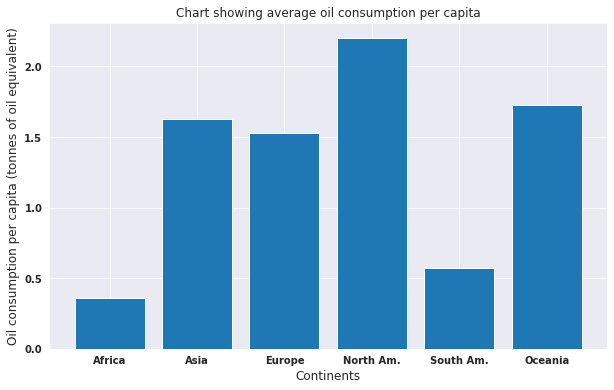

In [161]:
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.bar([1,2,3,4,5,6], [ma,mas,me,mn,ms,mo], tick_label = ['Africa','Asia','Europe','North Am.','South Am.','Oceania'])
plt.title('Chart showing average oil consumption per capita', fontsize=12)
plt.xlabel('Continents', fontsize=12)
plt.ylabel('Oil consumption per capita (tonnes of oil equivalent)', fontsize=12);

> _The bar chart shows that between 1965 and 2014, the continent of Africa consumed the least amount of oil per capita compared to other parts of the world. This was followed in order of increasing consumption by South America, Europe, Asia, oceania and then North America which topped the per capita oil consumption list in the world._

<a id='2'></a>
### 5.2.0 Key Question 2:
>### _How is the consumption of coal per capita distributed by continent_

### 5.2.1 Computations of average coal consumption per capita for each continent

In [34]:
# Compute total average coal consumption per capita in each continent between 1965 and 2014
# Merge coal dataframe to the df_country dataframe and drop the common country column
df_coal2 = df_country.merge(df_coal, left_on='country', right_on='country_coal', how='inner')
df_coal2.drop(['country_coal'], axis=1, inplace=True)

# Use query statement to create a dataframe for each continent and take the means
# Column means were computed, then summed and divided by number of years between 1965 and 2014(49yrs)
mca = round((df_coal2.query('continent == "Africa"').mean().sum())/49,2)
mcas = round((df_coal2.query('continent == "Asia"').mean().sum())/49,2)
mce = round((df_coal2.query('continent == "Europe"').mean().sum())/49,2)
mcn = round((df_coal2.query('continent == "North America"').mean().sum())/49,2)
mcs = round((df_coal2.query('continent == "South America"').mean().sum())/49,2)
mco = round((df_coal2.query('continent == "Oceania"').mean().sum())/49,2)

# A view of df_coal2 showing coal consumption data from 1965 to 2014
df_coal2.head()

,country,continent,1965_coal,1966_coal,1967_coal,1968_coal,1969_coal,1970_coal,1971_coal,1972_coal,...,2005_coal,2006_coal,2007_coal,2008_coal,2009_coal,2010_coal,2011_coal,2012_coal,2013_coal,2014_coal
0,Algeria,Africa,0.00554,0.00524,0.00389,0.0040,0.00495,0.0057,0.00154,0.00130,...,0.01780,0.02610,0.02210,0.02170,0.01370,0.00858,0.00747,0.00777,0.00412,0.00458
1,Argentina,South America,0.03570,0.03690,0.03560,0.0282,0.03710,0.0409,0.03310,0.02910,...,0.02880,0.02670,0.03050,0.03450,0.02340,0.03080,0.03720,0.03110,0.02950,0.03460
2,Australia,Oceania,1.53000,1.55000,1.55000,1.5500,1.57000,1.5500,1.53000,1.57000,...,2.56000,2.58000,2.51000,2.57000,2.44000,2.23000,2.14000,1.98000,1.86000,1.82000
3,Austria,Europe,0.69600,0.66000,0.62100,0.6100,0.59700,0.6390,0.58300,0.52700,...,0.48500,0.49100,0.47000,0.45000,0.34400,0.40200,0.41000,0.37900,0.38200,0.34700
4,Azerbaijan,Asia,0.34800,0.33000,0.31050,0.3050,0.29850,0.3195,0.29150,0.26419,...,0.00038,0.00037,0.00014,0.00079,0.00046,0.00006,0.00038,0.00006,0.00031,0.00017


### 5.2.2 Results of coal consumption

In [35]:
# Print all results
print("The following results are for data between 1965 and 2014:")
print("----------------------------------------------------------------")
print("The average coal consumption per capita in Africa is: {}".format(mca))
print("The average coal consumption per capita in Asia is: {}".format(mcas))
print("The average coal consumption per capita in Europe is: {}".format(mce))
print("The average coal consumption per capita in North America is: {}".format(mcn))
print("The average coal consumption per capita in South America is: {}".format(mcs))
print("The average coal consumption per capita in Oceania is: {}".format(mco))

The following results are for data between 1965 and 2014:
----------------------------------------------------------------
The average coal consumption per capita in Africa is: 0.55
The average coal consumption per capita in Asia is: 0.22
The average coal consumption per capita in Europe is: 0.74
The average coal consumption per capita in North America is: 0.67
The average coal consumption per capita in South America is: 0.05
The average coal consumption per capita in Oceania is: 1.26


### 5.2.3 Pie chart of coal consumption

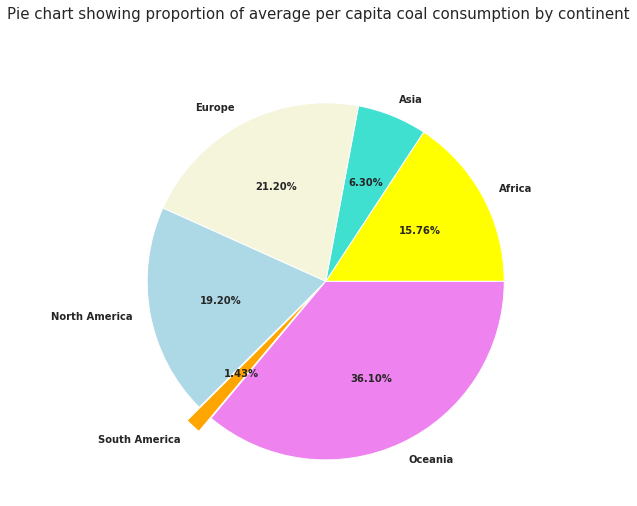

In [159]:
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 10
fig = plt.figure()
fig.suptitle('Pie chart showing proportion of average per capita coal consumption by continent', fontsize=15)
labels = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
values = [mca, mcas, mce, mcn, mcs, mco]
colors = ['yellow', 'turquoise', 'beige', 'lightblue', 'orange', 'violet']
plt.axis("equal")
explode = (0, 0, 0, 0, 0.1, 0)
plt.pie(values, colors=colors, labels=labels, autopct='%1.2f%%', textprops={'fontsize': 10}, explode=explode)
fig = plt.gcf();

> _From the computations and pie chart, we learn that Oceania consumed more coal per capita than any other continent. North America came in third, while South America consumed the least amount of coal per capita at only 1.4% of the global per capita average coal consumption between 1965 and 2014._

<a id='3'></a>
### 5.3.0 Key Question 3:
>### _How do the continents compare in average carbon dioxide emissions_

### 5.3.1 Computations of average carbon dioxide emission

In [141]:
# Compute total carbon dioxide emission from each continent between 1965 and 2014
# Merge carbon dioxide dataframe to the df-country dataframe and drop the common country column
df_co22 = df_country.merge(df_co2, left_on='country', right_on='country_co2', how='inner')
df_co22.drop(['country_co2'], axis=1, inplace=True)

# Use query statement to create a dataframe for each continent and take the means
# Column means were computed, then summed and divided by number of years between 1965 and 2014(49yrs)
mcoa = round((df_co22.query('continent == "Africa"').mean().sum())/49,2)
mcoas = round((df_co22.query('continent == "Asia"').mean().sum())/49,2)
mcoe = round((df_co22.query('continent == "Europe"').mean().sum())/49,2)
mcon = round((df_co22.query('continent == "North America"').mean().sum())/49,2)
mcos = round((df_co22.query('continent == "South America"').mean().sum())/49,2)
mcoo = round((df_co22.query('continent == "Oceania"').mean().sum())/49,2)

# A view of df_co22 showing carbon dioxide emissions data from 1965 to 2014
df_co22.head()

,country,continent,1965_co2,1966_co2,1967_co2,1968_co2,1969_co2,1970_co2,1971_co2,1972_co2,...,2005_co2,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2
0,Algeria,Africa,0.522,0.649,0.632,0.659,0.797,1.04,1.25,1.84,...,3.22,2.99,3.19,3.16,3.42,3.30,3.29,3.46,3.51,3.72
1,Argentina,South America,2.640,2.790,2.860,2.970,3.280,3.45,3.65,3.64,...,4.14,4.43,4.38,4.68,4.41,4.56,4.60,4.57,4.46,4.75
2,Australia,Oceania,10.600,10.300,10.800,11.000,11.300,11.50,11.70,11.80,...,17.30,17.80,17.80,18.10,18.20,17.70,17.40,17.00,16.10,15.40
3,Austria,Europe,5.230,5.340,5.400,5.690,5.980,6.74,6.91,7.41,...,8.99,8.71,8.39,8.28,7.49,8.03,7.69,7.31,7.28,6.80
4,Azerbaijan,Asia,6.950,7.140,7.280,7.300,7.440,7.66,7.97,8.23,...,4.02,4.54,3.50,4.02,3.57,3.40,3.66,3.84,3.80,3.94


### 5.3.2 Results of carbon dioxide emission

In [142]:
# Print all results
print("The following results are for emissions between 1965 and 2014:")
print("----------------------------------------------------------------")
print("The average carbon dioxide emission from Africa is: {}".format(mcoa))
print("The average carbon dioxide emission from Asia is: {}".format(mcoas))
print("The average carbon dioxide emission from Europe is: {}".format(mcoe))
print("The average carbon dioxide emission from North America is: {}".format(mcon))
print("The average carbon dioxide emission from South America is: {}".format(mcos))
print("The average carbon dioxide emission from Oceania is: {}".format(mcoo))

The following results are for emissions between 1965 and 2014:
----------------------------------------------------------------
The average carbon dioxide emission from Africa is: 4.19
The average carbon dioxide emission from Asia is: 9.7
The average carbon dioxide emission from Europe is: 8.59
The average carbon dioxide emission from North America is: 14.49
The average carbon dioxide emission from South America is: 2.72
The average carbon dioxide emission from Oceania is: 11.2


### 5.3.3 Plot of carbon dioxide emission

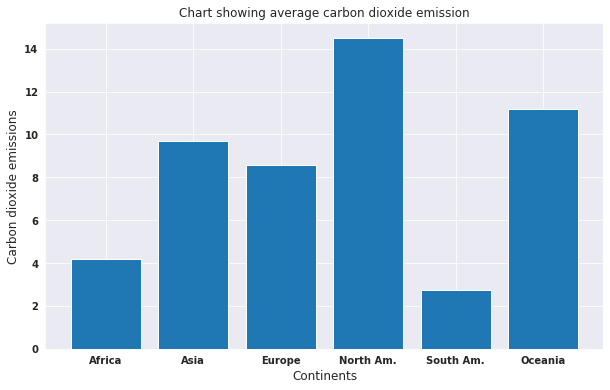

In [163]:
# Bar chart of co2 emissions data
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.bar([1,2,3,4,5,6], [mcoa,mcoas,mcoe,mcon,mcos,mcoo], tick_label = ['Africa','Asia','Europe','North Am.','South Am.','Oceania'])
plt.title('Chart showing average carbon dioxide emission', fontsize=12)
plt.xlabel('Continents', fontsize=12)
plt.ylabel('Carbon dioxide emissions', fontsize=12);

>_From the numbers computed and the above chart, we find that between 1965 and 2014, North America had the highest average aamount of carbon dioxide emission, while South America had the lowest. The second highest continent was Asia, followed by Oceania, Europe and the Africa coming in at fifth highest._

<a id='4'></a>
### 5.4.0 Key Question 4:
>### _How is average life expectancy distributed across continents_

### 5.4.1 Computations of average life expectancy

In [165]:
# Compute total average life expectancy for each continent between 1965 and 2014
# Merge life expectancy dataframe to the df-country dataframe and drop the common country column
df_life2 = df_country.merge(df_life, left_on='country', right_on='country_life', how='inner')
df_life2.drop(['country_life'], axis=1, inplace=True)

# Use query statement to create a dataframe for each continent and take the means
# Column means were computed, then summed and divided by number of years between 1965 and 2014(49yrs)
mla = round((df_life2.query('continent == "Africa"').mean().sum())/49,2)
mlas = round((df_life2.query('continent == "Asia"').mean().sum())/49,2)
mle = round((df_life2.query('continent == "Europe"').mean().sum())/49,2)
mln = round((df_life2.query('continent == "North America"').mean().sum())/49,2)
mls = round((df_life2.query('continent == "South America"').mean().sum())/49,2)
mlo = round((df_life2.query('continent == "Oceania"').mean().sum())/49,2)

# A view of df_life2 showing life expectancy data from 1965 to 2014
df_life2.head()

,country,continent,1965_life,1966_life,1967_life,1968_life,1969_life,1970_life,1971_life,1972_life,...,2005_life,2006_life,2007_life,2008_life,2009_life,2010_life,2011_life,2012_life,2013_life,2014_life
0,Algeria,Africa,55.4,56.0,56.5,57.0,57.6,58.1,58.4,58.8,...,75.3,75.5,75.7,75.9,76.1,76.3,76.5,76.8,76.9,77.0
1,Argentina,South America,64.7,64.8,64.9,65.1,65.3,65.6,65.8,66.2,...,75.3,75.4,75.1,75.5,75.6,75.8,75.9,76.0,76.1,76.4
2,Australia,Oceania,71.2,71.0,71.3,71.0,71.4,71.0,71.3,71.6,...,81.2,81.4,81.4,81.5,81.7,82.0,82.1,82.5,82.6,82.5
3,Austria,Europe,70.2,70.5,70.4,70.5,70.3,70.3,70.5,70.7,...,79.6,80.1,80.2,80.4,80.3,80.6,80.8,81.0,81.2,81.4
4,Azerbaijan,Asia,60.6,61.0,61.4,61.7,62.0,62.3,63.0,63.6,...,67.5,68.0,68.5,68.8,69.1,69.3,69.5,69.8,70.1,70.3


### 5.4.2 Results of life expectancy computations (yrs)

In [166]:
# Print all results
print("The following results are for continental emissions between 1965 and 2014:")
print("--------------------------------------------------------------------------")
print("The average life expectancy in Africa is: {} yrs.".format(mla))
print("The average life expectancy in Asia is: {} yrs.".format(mlas))
print("The average life expectancy in Europe is: {} yrs.".format(mle))
print("The average life expectancy in North America is: {} yrs.".format(mln))
print("The average life expectancy in South America is: {} yrs.".format(mls))
print("The average life expectancy in Oceania is: {} yrs.".format(mlo))

The following results are for continental emissions between 1965 and 2014:
--------------------------------------------------------------------------
The average life expectancy in Africa is: 64.46 yrs.
The average life expectancy in Asia is: 69.65 yrs.
The average life expectancy in Europe is: 75.76 yrs.
The average life expectancy in North America is: 74.41 yrs.
The average life expectancy in South America is: 71.64 yrs.
The average life expectancy in Oceania is: 77.7 yrs.


### 5.4.3 Plot of average life expectancies

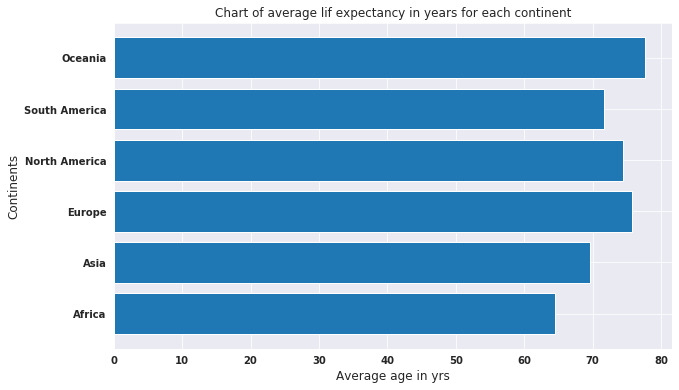

In [167]:
# Horizontal bar chart plot
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
tick_labels = ('Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania')
avg_age = [mla, mlas, mle, mln, mls, mlo]
plt.barh(tick_labels, avg_age)
plt.xlabel("Average age in yrs", fontsize=12)
plt.ylabel("Continents", fontsize=12)
plt.title('Chart of average lif expectancy in years for each continent', fontsize=12)
plt.show();

>_Between 1965 and 2014, Oceania had the highest total averaga life expectancy than everyone else at about 77yrs. Europe came in next at close to 76yrs, North America at about 74yrs, South America at about 72yrs, Asia at about 70yrs, and Africa at about 64yrs._

<a id='5'></a>
### 5.5.0 Key Question #5:
### _How much has the consumption per capita of oil and coal, and carbon dioxide emissions changed on average for each continent between 1965 and 2014_

### 5.5.1 Computation of oil and coal consumption changes for each continent

In [168]:
# Create a new dataframe called compare with oil and coal columns of 1965 and 2014
compare = df_combo.loc[:,['continent','1965_oil','2014_oil','1965_coal','2014_coal','1965_co2','2014_co2']]
# Find the mean of each continent
mean_change = compare.groupby('continent').mean()
mean_change

,1965_oil,2014_oil,1965_coal,2014_coal,1965_co2,2014_co2
continent,,,,,,
Africa,0.202667,0.454667,0.419547,0.552957,2.615667,4.966667
Asia,1.430072,1.892935,0.108073,0.416571,9.302346,9.898913
Europe,1.232663,1.171615,0.860731,0.483612,6.721923,6.517692
North America,1.972250,1.937000,0.565125,0.521500,9.295000,17.417500
Oceania,1.180000,1.815000,1.078000,1.070500,7.910000,11.495000
South America,0.455143,0.705857,0.043093,0.099559,2.032714,3.510000


In [169]:
# The follwoing created new columns for oil/coal consumption difference between 1965 and 2014 
mean_change['oil_change'] = mean_change['2014_oil'] - mean_change['1965_oil']
mean_change['coal_change'] = mean_change['2014_coal'] - mean_change['1965_coal']
mean_change['co2_change'] = mean_change['2014_co2'] - mean_change['1965_co2']
mean_change

,1965_oil,2014_oil,1965_coal,2014_coal,1965_co2,2014_co2,oil_change,coal_change,co2_change
continent,,,,,,,,,
Africa,0.202667,0.454667,0.419547,0.552957,2.615667,4.966667,0.252000,0.133410,2.351000
Asia,1.430072,1.892935,0.108073,0.416571,9.302346,9.898913,0.462863,0.308498,0.596567
Europe,1.232663,1.171615,0.860731,0.483612,6.721923,6.517692,-0.061048,-0.377120,-0.204231
North America,1.972250,1.937000,0.565125,0.521500,9.295000,17.417500,-0.035250,-0.043625,8.122500
Oceania,1.180000,1.815000,1.078000,1.070500,7.910000,11.495000,0.635000,-0.007500,3.585000
South America,0.455143,0.705857,0.043093,0.099559,2.032714,3.510000,0.250714,0.056466,1.477286


In [170]:
# The following created new columns for % change in consumption between 1965 and 2014
mean_change['oil_change_perc'] = (mean_change['oil_change']/mean_change['1965_oil'])*100
mean_change['coal_change_perc'] = (mean_change['coal_change']/mean_change['1965_coal'])*100
mean_change['co2_change_perc'] = (mean_change['co2_change']/mean_change['1965_co2'])* 100
mean_change

,1965_oil,2014_oil,1965_coal,2014_coal,1965_co2,2014_co2,oil_change,coal_change,co2_change,oil_change_perc,coal_change_perc,co2_change_perc
continent,,,,,,,,,,,,
Africa,0.202667,0.454667,0.419547,0.552957,2.615667,4.966667,0.252000,0.133410,2.351000,124.342105,31.798608,89.881483
Asia,1.430072,1.892935,0.108073,0.416571,9.302346,9.898913,0.462863,0.308498,0.596567,32.366421,285.453592,6.413077
Europe,1.232663,1.171615,0.860731,0.483612,6.721923,6.517692,-0.061048,-0.377120,-0.204231,-4.952534,-43.813889,-3.038279
North America,1.972250,1.937000,0.565125,0.521500,9.295000,17.417500,-0.035250,-0.043625,8.122500,-1.787299,-7.719531,87.385691
Oceania,1.180000,1.815000,1.078000,1.070500,7.910000,11.495000,0.635000,-0.007500,3.585000,53.813559,-0.695733,45.322377
South America,0.455143,0.705857,0.043093,0.099559,2.032714,3.510000,0.250714,0.056466,1.477286,55.084746,131.032654,72.675522


### 5.5.2 Analysis of oil consumption data between 1965 and 2014

In [171]:
# Display taable to help analyze oil consumption per capita for each continent
d_oil = mean_change[['1965_oil', '2014_oil','oil_change',]]
d_oil

,1965_oil,2014_oil,oil_change
continent,,,
Africa,0.202667,0.454667,0.252000
Asia,1.430072,1.892935,0.462863
Europe,1.232663,1.171615,-0.061048
North America,1.972250,1.937000,-0.035250
Oceania,1.180000,1.815000,0.635000
South America,0.455143,0.705857,0.250714


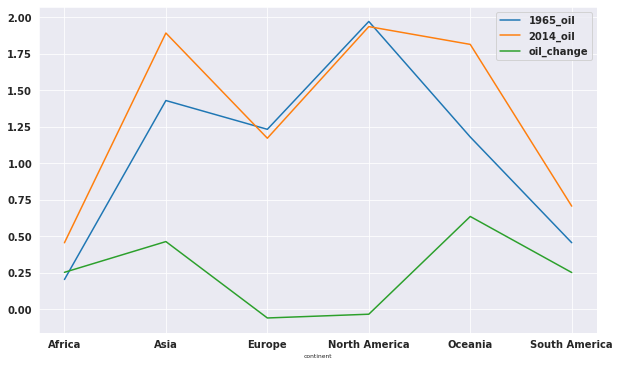

In [172]:
#Plot of oil consumption per capita
d_oil.plot();

>_Ideally for the global environment, the green line would be below the orange line, and the blue would be at points below zero. The only continents that met this semblance of environmentally friendly trend between 1965 and 2014 were Europe and North America._

>_Overall per capita oil consumption declined by almost 2% in North America between 1965 and 2014. Europe showed a decline of almost 5%, while Africa and oceania saw an increase of about 124% and 54% respectively. Asia and South America saw increases of about 32% and 55% respectively within the same time period._

### 5.5.3 Analysis of coal consumption data between 1965 and 2014

In [429]:
# Display taable to help analyze coal consumption per capita for each continent
d_coal = mean_change[['1965_coal', '2014_coal', 'coal_change']]
d_coal

,1965_coal,2014_coal,coal_change
continent,,,
Africa,0.419547,0.552957,0.133410
Asia,0.108073,0.416571,0.308498
Europe,0.860731,0.483612,-0.377120
North America,0.565125,0.521500,-0.043625
Oceania,1.078000,1.070500,-0.007500
South America,0.043093,0.099559,0.056466


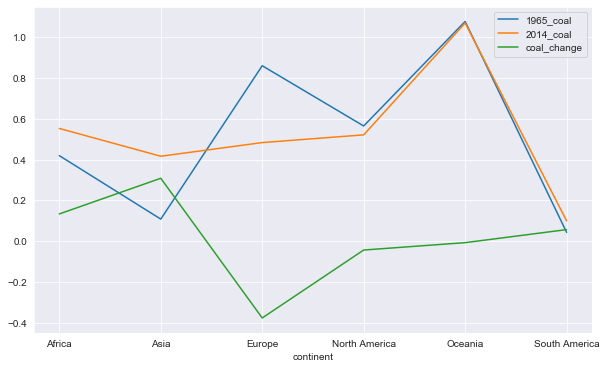

In [430]:
#Plot of oil consumption per capita
d_coal.plot();

>_Between 1965 and 2014, Asia increased coal consumption per capita by about 285%. South America was next at a change of about 131%, while Africa showed an increase of about 32%._

>_Europe used significantly less coal per capita in 2014 than they did in 1965 with about a 44% decrease in per capita consumption. The other declines in coal consumption were North America at nearly an 8% decline in coal use, and Oceania which showed an 0.7% decline in coal consumption per capita._

### 5.5.4 Analysis of continental carbon dioxide emissions

In [431]:
# Display taable to help analyze co2 emissions from each continent
d_co2 = mean_change[['1965_co2', '2014_co2', 'co2_change']]
d_co2

,1965_co2,2014_co2,co2_change
continent,,,
Africa,2.615667,4.966667,2.351000
Asia,9.302346,9.898913,0.596567
Europe,6.721923,6.517692,-0.204231
North America,9.295000,17.417500,8.122500
Oceania,7.910000,11.495000,3.585000
South America,2.032714,3.510000,1.477286


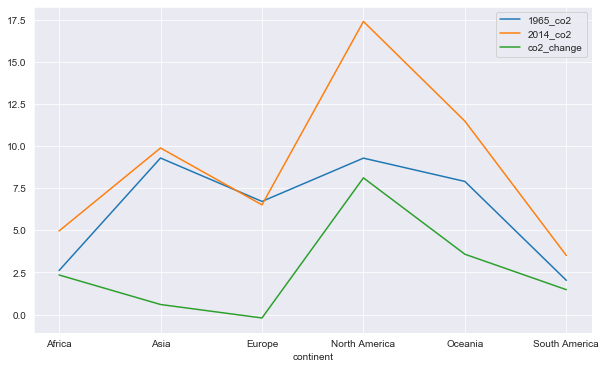

In [432]:
# Plot of continental co2 emissions 
d_co2.plot();

>_The results show that between 1965 and 2014, carbon dioxide emission increased in every continent except Europe.  while North America and Africa increased by 87% and 89% respectively in average carbon dioxide emission in the time period under study._

<a id='6'></a>
### 5.6.0 Key Question #6:
### _Do countries with higher carbon dioxide emission have lower expectancies in 2014_ 

### 5.6.1 Create new dataframe of country and 2014 data for co2 and life expectancy

In [173]:
# Create a dataframe with country and 2014 data for co2 and life expectancy 
df_co2_life = df_combo[['country','2014_co2','2014_life']]
df_co2_life.head()

,country,2014_co2,2014_life
0,Algeria,3.72,77.0
1,Argentina,4.75,76.4
2,Australia,15.40,82.5
3,Austria,6.80,81.4
4,Azerbaijan,3.94,70.3


### 5.6.2 Description of 2014_co2 column and creation of new column of co2 emissions

In [174]:
# Get statistical info for the 2014 co2 emission column
df_co2_life['2014_co2'].describe()

count    65.000000
mean      8.142538
std       7.637949
min       0.459000
25%       4.290000
50%       5.980000
75%       9.100000
max      45.400000
Name: 2014_co2, dtype: float64

In [175]:
# Add a new column for co2 emissions levels based on the 2014_co2 stats
bin_edges = [0.459, 4.29, 5.98, 9.1, 45.4]
bin_names = ['Low', 'Mod_low', 'Mod_high', 'High']
df_co2_life['co2_emissions_level'] = pd.cut(df_co2_life['2014_co2'], bin_edges, labels=bin_names)
df_co2_life.head()

/Users/menaekelemu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,country,2014_co2,2014_life,co2_emissions_level
0,Algeria,3.72,77.0,Low
1,Argentina,4.75,76.4,Mod_low
2,Australia,15.40,82.5,High
3,Austria,6.80,81.4,Mod_high
4,Azerbaijan,3.94,70.3,Low


### 5.6.3.0  Analysis of co2 and life expectancy data

In [176]:
# Group data by co2 emissions level and find mean of life expectancy
clm = df_co2_life.groupby(['co2_emissions_level'], as_index=False)['2014_life'].mean()
clm

,co2_emissions_level,2014_life
0,Low,73.894118
1,Mod_low,78.853333
2,Mod_high,77.781250
3,High,78.381250


### 5.6.3.1 Bar Chart and Scatter plot of co2 V Life Expectancy data

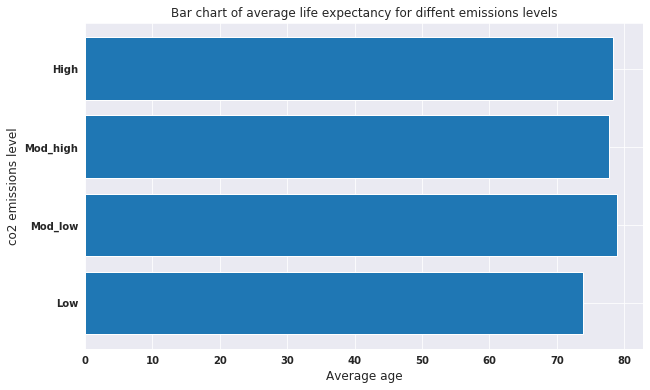

In [177]:
# Code for bar chart
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.barh([1, 2, 3, 4], [clm['2014_life'][0], clm['2014_life'][1], clm['2014_life'][2], clm['2014_life'][3]], tick_label=['Low','Mod_low','Mod_high','High'])
plt.title('Bar chart of average life expectancy for diffent emissions levels', fontsize=12)
plt.ylabel('co2 emissions level', fontsize=12)
plt.xlabel('Average age', fontsize=12);

>_There appears to be no clear relationship between levels of carbon dioxide emissions and average life expectancy for the sixty-five countries studied in 2014 as shown in the horizontal bar chart above._

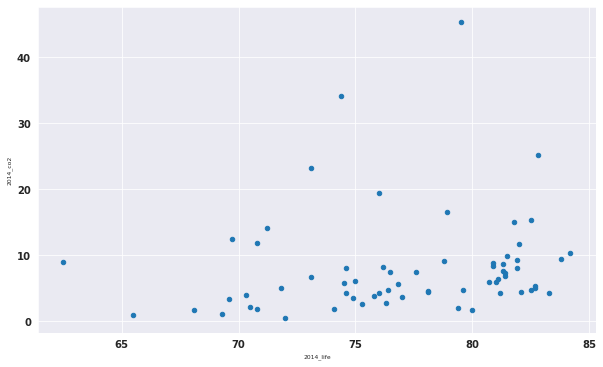

In [178]:
# Scatter plot for df_co2_life
df_co2_life.plot(x = '2014_life', y = '2014_co2', kind = 'scatter');

>_The scatter plot shown above shows a positive but weak correlation between the carbon dioxide emissions and the average life expectancy in 2014._

<a id='conclusions'></a>
## 6.0 Conclusions and Limitation

>* _Due to global warming and other negative human health and environmental effects, world governments would do well to find ways to minimize fossil fuel production and consumption in general. However, in the period between 1965 and 2014, most regions of the world saw an increase in the use of fossil fuels with only a couple of exceptions. North America shwoed reductions in both oil and coal consumptions per capita, while Europe cut down on the consumption of coal per capita). This may be due in part to the adoption of alternative energy sources in these continents adoption of which may be due to being more economically developed than most other countries across the world._


>* _With regards to carbon dioxide emission, Asia and Europe appear to be on the right path, each showing slight decreases in average emission. The rest of the world showed high double digit percent increases, while Oceania topped the rate of increase of emissions list with a whopping 114% increase between 1965 and 2014._


>* _There was a very weak postive correlation between carbon dioxide emission and life expectancy. Therefore its safe to conclude that carbon dioxide emissions does not appear to have any clear effect on life expectancy specifically for the 2014 data, and for the sixty-five countries studied._


>* _The original data for oil and coal consumption per capita respectively had sixty five countries and ranged from 1965 to 2016. The life expectancy data originally had 187 countries and ranged from 1800 to 2100, and the carbon dioxide emissions data had 192 countries and a ranged form 1800 to 2014. Most of the cells in the 1800s and early 1900s were full of null values for the co2 and life expectancy data, and the discrepancies in sizes and dimension of the dataframes posed a challenge which led to the slicing off of most of their columns. The final merge of dataframes cut down the number of countries to sixty-five. It is possible that results could be different if more countries were inluded in the study._


>* _For continental classifications, the number of countries in some of the continents may not have been enough for numbers to be representative of the desired continent. Africa for instance only had three countries in the study contained in the Africa category. This were Algeria, Egypt and South Africa. Apparently most of the other African countries may not have had enough data for the parameters being studied to fall into the final dataframe._